Домашнее задание №1.

Работу выполнила: Шишкина Валерия, 3821Б1ФИ3

Задача классификации

0. Постановка задачи
   
   Задача: прогнозирование инсульта.
   
   На основе предоставленных данных построить классификационную модель, которая будет предсказывать, возникновение у человека инсульта.

1. Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/ЛЕРА/Desktop/healthcare-dataset-stroke-data.csv')
pd.set_option('display.max_columns', None)

В начале поработаем с выводом данных различными способами.

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Метод data.head() выводит информацию о первых пяти строках таблицы.

In [7]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Метод data.tail() выводит информацию о последних пяти строках таблицы.

Теперь посмотрим на размеры таблицы:количество строк (каждая строка - пациент), количечество столбцов (каждый столбец - конкретный признак).

In [8]:
print(data.shape)

(5110, 12)


Видим, что количество пациентов - 5110, количество признаков - 12.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


С помощью метода data.info() можем получить информацию о нашей таблице.

Видим, что столбцы-признаки имеют имена:

id  - идентификатор пациента.

age - возраст.

gender - пол.

hypertension - наличие гипертонии.

heart_disease - наличие сердечных заоблеваний.

ever_married - был ли пациент когда-либо женат?

work_type - вид деятельности пациента.

Residence_type - тип места жительства пациента.

avg_glucose_level - средний уровень глюкозы в крови.

bmi - индекс массы тела.

smoking_status - статус курения.

stroke - произошел инсульт или нет.

Категориальные признаки: gender, ever_married, work_type, Residence_type, smoking_status.

Количественные признаки: все остальные.

In [10]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Метод print(data.columns) используется для вывода названий столбцов. В процессе решения задачи, может понадобиться переименовать столбцы нашей таблицы, это можно сделать с помощью метода  data.rename(columns=...).

Имена строк (совпадают с номерами):

In [11]:
data.index

RangeIndex(start=0, stop=5110, step=1)

В процессе решения задачи может потребоваться обратить к какому-то одному или нескольким отдельным столбцам, к отдельному элементу, получить тип элеменета или признака, и т.д. Это можно сделать следующим образом:

In [12]:
data.at[2, 'hypertension']

0

In [13]:
data.at[2, 'age']

80.0

In [14]:
data['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [15]:
data['work_type'][2]

'Private'

In [16]:
data['age'].dtype.name

'float64'

In [17]:
type(data['age'][3])

numpy.float64

In [18]:
type(data['age'])

pandas.core.series.Series

In [19]:
type(data['work_type'])

pandas.core.series.Series

In [20]:
data[['age', 'hypertension']].head()

,age,hypertension
0,67.0,0
1,61.0,0
2,80.0,0
3,49.0,0
4,79.0,1


На основании выведенных данных можно увидеть, что только у одного человека из пяти есть гипертония.

In [21]:
data[['id', 'age', 'heart_disease']].head()

,id,age,heart_disease
0,9046,67.0,1
1,51676,61.0,0
2,31112,80.0,1
3,60182,49.0,0
4,1665,79.0,0


На основании выведенных данных можно увидеть, что у двоих из пяти человек наблюдаются сердечно-сосудистые заболевания.

2. Обработка пропущенных значений

In [22]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Пропущенные значения в таблице представлены значениями np.nan.

Метод data.isnull().sum() используется для проверки наличия пропущенных значений. Он возвращает количество пропущенных значений для каждого столбца.

В моем случае, видно, что есть пропущенные значения.

С пропущенными значениями можно сделать следующее: удалить строки с пропущенными значениями, либо заполнить их какими-нибудь значениями. Можно заполнить медианой, средним или модой.

В своей реализации я заполню средним значением пропуски. Затем убедимся в том, что действительно все пропущенные значения обработаны.

In [24]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [25]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Пропущенных значений нет.

3. Визуализация данных

In [26]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Метод data.describe() используется для получения сводной статистики о числовых столбцах в DateFrame. Он возвращает такие показатели, как:
1. count - количество ненулевых значений
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение
5. 25% - нижний квартиль
6. 50% - медиана
7. 75% - верхний квартиль
8. max - максимальное значение

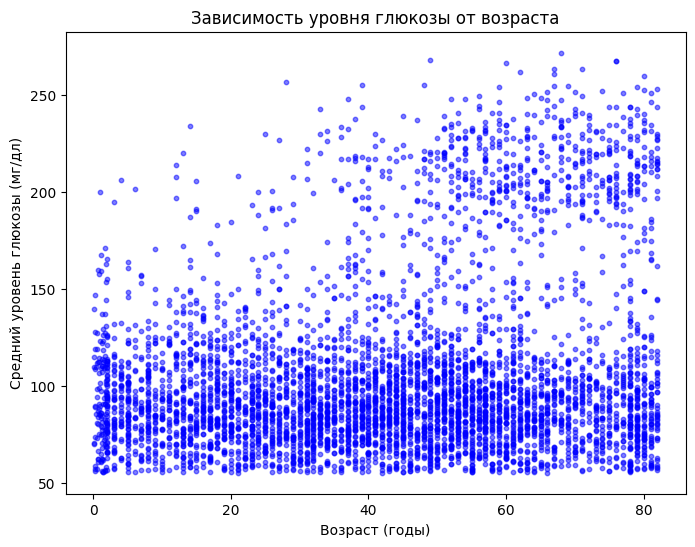

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['avg_glucose_level'], s=10, c='blue', alpha=0.5)
plt.xlabel('Возраст (годы)') 
plt.ylabel('Средний уровень глюкозы (мг/дл)') 
plt.title('Зависимость уровня глюкозы от возраста')
plt.show()

Нормальные показатели уровня глюкозы в крови зависят от состояния человека (натощак или после еды) и возраста. 

Новорожденные (до 1 месяца): 45–90 мг/дл 

Дети от 1 месяца до 5 лет: 70–100 мг/дл

Дети старше 5 лет и взрослые: 70–100 мг/дл 

Видно, что в основном уровень глюкозы у многих людей либо в пределах нормы, либо чуть выше, но также есть люди, у которых уровень глюкозы в крови зашкаливает.

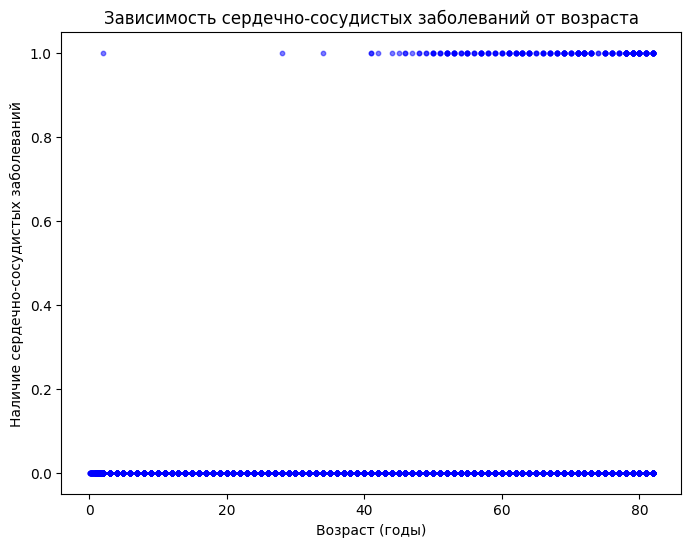

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['heart_disease'], s=10, c='blue', alpha=0.5)
plt.xlabel('Возраст (годы)') 
plt.ylabel('Наличие сердечно-сосудистых заболеваний') 
plt.title('Зависимость сердечно-сосудистых заболеваний от возраста')
plt.show()

На графике видно, в основном сердечно-сосудистыми заболеваниями страдают люди, возраст которых больше 40 лет. Но также, есть люди, у которых в более раннем возрасте уже есть эти заболевания.

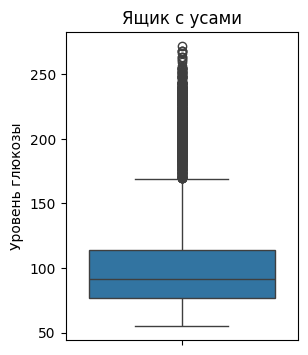

In [35]:
import seaborn as sns
plt.figure(figsize=(3, 4))
sns.boxplot(y="avg_glucose_level", data = data)
plt.title('Ящик с усами')
plt.ylabel('Уровень глюкозы') 
plt.show()
pass

Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

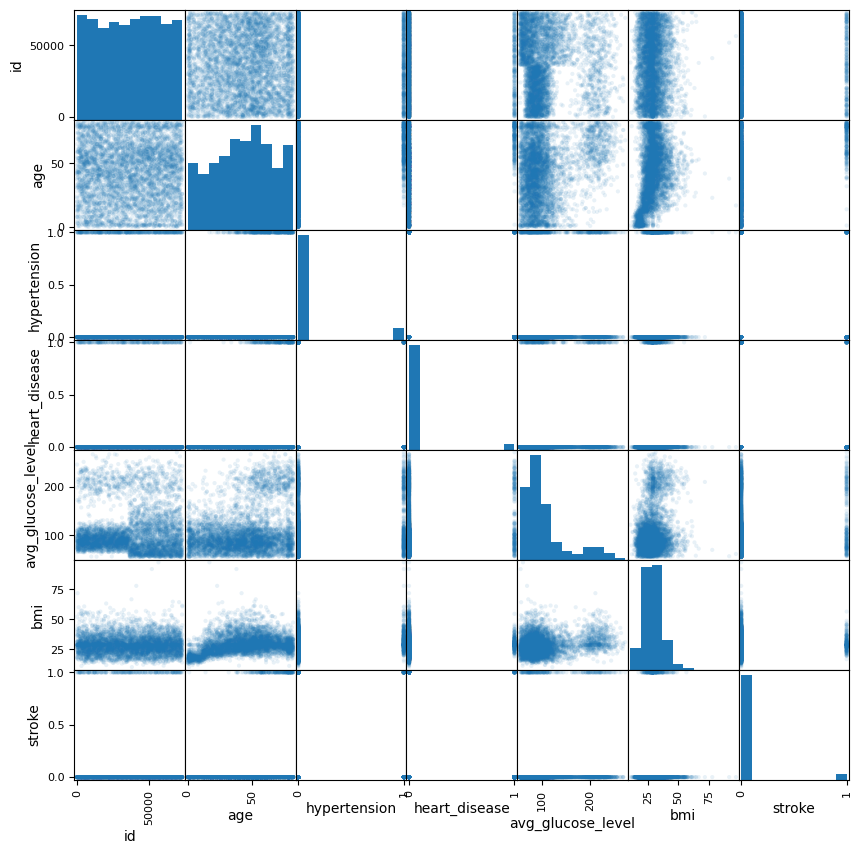

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .1, figsize = (10, 10))
pass

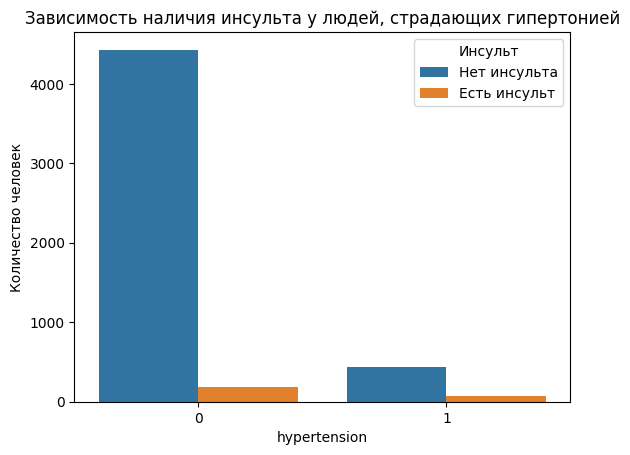

In [40]:
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Зависимость наличия инсульта у людей, страдающих гипертонией')
plt.ylabel('Наличие инсульта') 
plt.ylabel('Количество человек') 
plt.legend(title='Инсульт', labels=['Нет инсульта', 'Есть инсульт'], loc='upper right')
pass

Исходя из графика видно, что если у человека есть гипертония, это еще ничего не значит, что у него может случиться инсульт. Риск есть, но низкий.

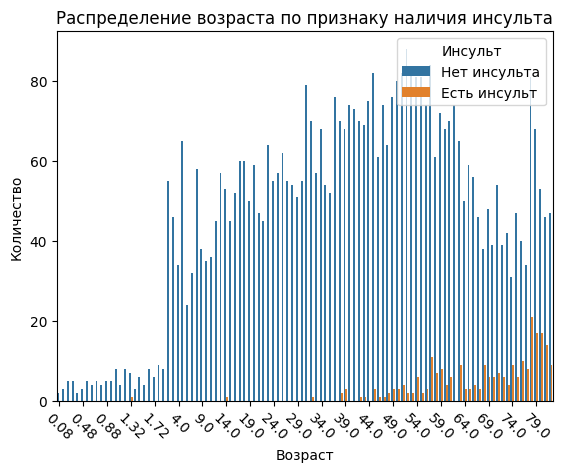

In [41]:
import seaborn as sns
sns.countplot(x='age', hue='stroke', data=data)
plt.title('Распределение возраста по признаку наличия инсульта')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Stroke')
plt.xticks(ticks=plt.xticks()[0][::5], rotation=-45)
plt.legend(title='Инсульт', labels=['Нет инсульта', 'Есть инсульт'], loc='upper right')
plt.show()

В основном инсульт возникает у человека в 39 лет и более.

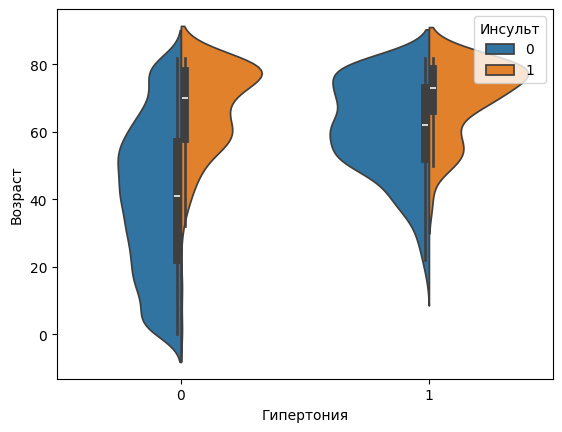

In [44]:
sns.violinplot(x="hypertension", y="age", hue="stroke", split=True, data=data)
plt.ylabel('Возраст')
plt.xlabel('Гипертония')
plt.legend(title='Инсульт')
pass

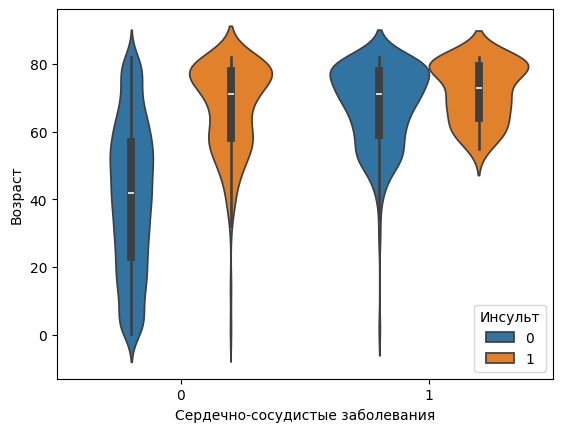

In [47]:
sns.violinplot(x="heart_disease", y="age", hue="stroke", data=data)
plt.ylabel('Возраст')
plt.xlabel('Сердечно-сосудистые заболевания')
plt.legend(title='Инсульт')
pass

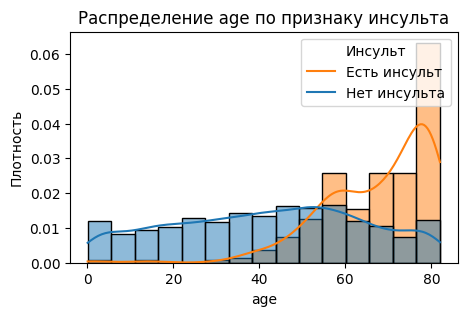

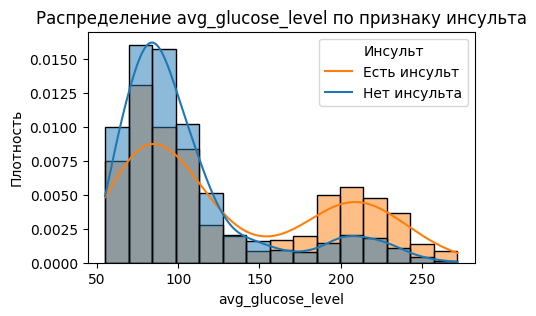

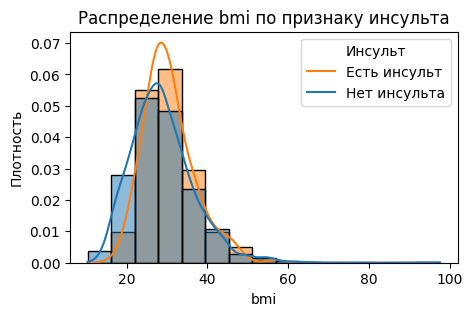

In [48]:
data_second = pd.read_csv('C:/Users/ЛЕРА/Desktop/healthcare-dataset-stroke-data.csv')
coll = ['age', 'avg_glucose_level', 'bmi']
for feature in coll:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data_second, x=feature, hue='stroke', bins=15, kde=True, stat='density', common_norm=False)
    plt.title(f'Распределение {feature} по признаку инсульта')
    plt.xlabel(feature)
    plt.ylabel('Плотность')
    plt.legend(title='Инсульт', labels=['Есть инсульт', 'Нет инсульта'], loc='upper right')
    plt.show()

Построила гистограммы, которые показывают зависимости между указанными признаками по признаку наличия инсульта.

4. Обработка категориальных признаков

In [49]:
category_columns = [
    'gender', 'ever_married', 'work_type', 'Residence_type',
    'smoking_status']

for column in category_columns:
    data[column] = data[column].astype('category')

In [50]:
data['gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [51]:
data.describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Категориальные признаки можно обрабатывать по-разному. Можно в ручную, а можно использовать определенные методы. Рассмотрим оба способа.

Начнем с обработки вручную.

In [52]:
unique_values = data['gender'].unique()
print(unique_values)

['Male', 'Female']
Categories (2, object): ['Female', 'Male']


Признак "Пол" содержит два уникальных значения: ['Male', 'Female']. Пусть Male - 0, Female - 1. Заменим значения с помощью map.

In [53]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

In [54]:
data['gender']

0       0
1       1
2       0
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    0
5109    1
Name: gender, Length: 5110, dtype: category
Categories (2, int64): [1, 0]

Таким образом, мы обработали категориальный признак gender. Преобразуем остальные признаки с помощью get_dummies (преобразует категориальные столбцы в бинарные (0 и 1).)

In [55]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [56]:
data = pd.get_dummies(data, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

print(data.head())

      id gender   age  hypertension  heart_disease  avg_glucose_level  \
0   9046      0  67.0             0              1             228.69   
1  51676      1  61.0             0              0             202.21   
2  31112      0  80.0             0              1             105.92   
3  60182      1  49.0             0              0             171.23   
4   1665      1  79.0             1              0             174.12   

         bmi  stroke  ever_married_Yes  work_type_Never_worked  \
0  36.600000       1              True                   False   
1  28.893237       1              True                   False   
2  32.500000       1              True                   False   
3  34.400000       1              True                   False   
4  24.000000       1              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False      

In [57]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [58]:
columns_to_convert = [
    'gender', 
    'ever_married_Yes', 
    'work_type_Never_worked', 
    'work_type_Private', 
    'work_type_Self-employed', 
    'work_type_children', 
    'Residence_type_Urban', 
    'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 
    'smoking_status_smokes'
]

data[columns_to_convert] = data[columns_to_convert].replace({True: 1, False: 0})


C:\Users\ЛЕРА\AppData\Local\Temp\ipykernel_17436\1563208004.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_convert] = data[columns_to_convert].replace({True: 1, False: 0})


In [59]:
data

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,228.69,36.600000,1,1,0,1,0,0,1,1,0,0
1,51676,1,61.0,0,0,202.21,28.893237,1,1,0,0,1,0,0,0,1,0
2,31112,0,80.0,0,1,105.92,32.500000,1,1,0,1,0,0,0,0,1,0
3,60182,1,49.0,0,0,171.23,34.400000,1,1,0,1,0,0,1,0,0,1
4,1665,1,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,83.75,28.893237,0,1,0,1,0,0,1,0,1,0
5106,44873,1,81.0,0,0,125.20,40.000000,0,1,0,0,1,0,1,0,1,0
5107,19723,1,35.0,0,0,82.99,30.600000,0,1,0,0,1,0,0,0,1,0
5108,37544,0,51.0,0,0,166.29,25.600000,0,1,0,1,0,0,0,1,0,0


Видим, что все признаки, которые были категориальными обработаны.

In [60]:
correlation_matrix = data.corr()
correlation_matrix['stroke']

id                                0.006388
gender                           -0.009027
age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.038947
stroke                            1.000000
ever_married_Yes                  0.108340
work_type_Never_worked           -0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children               -0.083869
Residence_type_Urban              0.015458
smoking_status_formerly smoked    0.064556
smoking_status_never smoked      -0.004129
smoking_status_smokes             0.008939
Name: stroke, dtype: float64

Матрица корреляции показывает степень и направление линейной зависимости между переменными. Значения варьируются от -1 до 1:

1: Полная положительная корреляция (при увеличении одной переменной другая также увеличивается).

0: Нет корреляции.

-1: Полная отрицательная корреляция (при увеличении одной переменной другая уменьшается).

Проанализировав значения, можно сказать, что признак age имеет сильную положительную корреляцию с stroke, hypertension и heart_disease также положительно коррелируют с stroke. Признаки, такие как gender и Residence_type_Urban, имеют очень слабую корреляцию с инсультом.

Удобно использовать визуальный образ этой матрицы. Чем ярче ячейка, тем больше по абсолютной величине коэффициент корреляции.

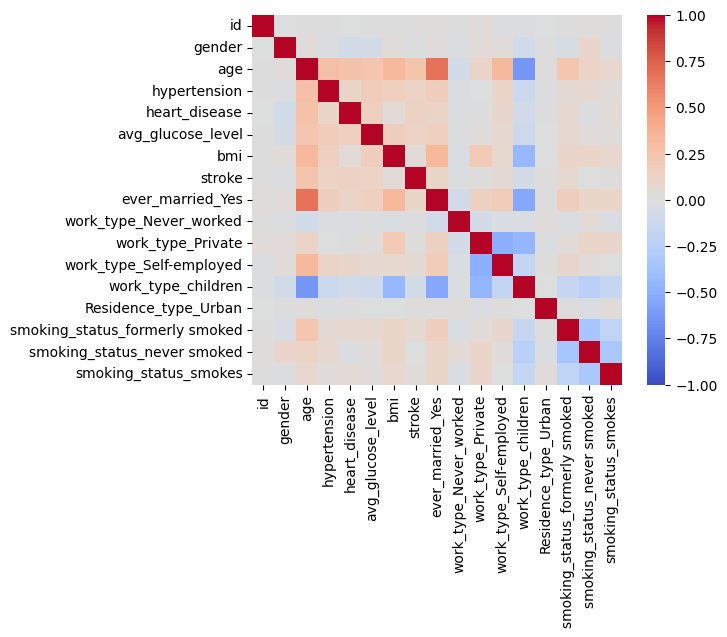

In [61]:
sns.heatmap(correlation_matrix, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

5. Обучающая и тестовые выборки

Для предсказания инсульта буду использовать все входные признаки, кроме id.

In [137]:
X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Разделили данные на обучающую и тестовую выборки.

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
    results[name] = scores.mean()
    
for name, mean_score in results.items():
    print(f"{name}: {mean_score:.4f}")

best_model_name = max(results, key=results.get)
print(f"\nНаилучшая модель: {best_model_name} с точностью {results[best_model_name]:.4f}")

SVM: 0.9559
Random Forest: 0.9556
Gradient Boosting: 0.9533
KNN: 0.9504

Наилучшая модель: SVM с точностью 0.9559


Оценили каждый алгоритм с использованием кросс-валидации. Видим, что SVM показал наилучший результат. В моей задаче хочется рассмотреть Random Forest, его точность тоже достаточно высока. Имеет следующие параметры: (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None). В дальнейшем будем экспериментировать, меняя параметры, и анализировать ситуацию.

In [143]:
rf = RandomForestClassifier(n_estimators= 3, min_samples_split = 4, min_samples_leaf = 2, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_error = np.mean(y_train != y_train_pred)
test_error = np.mean(y_test != y_test_pred)

train_error, test_error

(0.03418580375782881, 0.06416275430359937)

Видим, что на тестовой выборке у нас ошибка 3,4%, на обучаемой выборке 6,4%. 

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



Функция classification_report позволяет получить подробный отчет о качестве модели. Этот отчет включает в себя такие метрики, как precision, recall, F1-score и support для каждого класса. Для класса 1 нам нужно обратить внимание на метрику recall, поскольку должны минимизировать FN, так если человек на самом деле болен, а наша модель предсказала, что он здоров, это не хорошо. Для класса 0, который соответствует отсутствию инсульта, важно обратить внимание на precision. Это связано с тем, что при предсказании, что человек здоров, хотим быть уверенными, что это действительно так. 

Модель хорошо распознает класс 0, но имеет серьезные проблемы с распознаванием класса 1. Это может быть связано с несбалансированными данными, где класс 0 значительно преобладает над классом 1. Попробуем поменять параметры.

In [145]:
rf = RandomForestClassifier(n_estimators=10, max_depth = 60, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.007567849686847599, 0.06259780907668232)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.72      0.51      0.50      1278
weighted avg       0.91      0.94      0.91      1278



Ситуация стала немного лучше.

In [148]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 8,class_weight='balanced', min_samples_split = 4,min_samples_leaf = 3,max_depth = 3, max_features='log2', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

train_error = np.mean(y_train_resampled != y_train_pred)
test_error = np.mean(y_test != y_test_pred)

train_error, test_error

(0.18741468741468742, 0.2543035993740219)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1198
           1       0.16      0.75      0.27        80

    accuracy                           0.75      1278
   macro avg       0.57      0.75      0.56      1278
weighted avg       0.93      0.75      0.81      1278



После балансировки, результат значительно улучшился. На самом деле, менялись еще параметры, чтобы дойти до этого результата, но приведен только конечный результат. 

Уже видно, что модель имеет ошибку 18,7% на тестовой выборке и 25,4% на обучаемой. В целом, результат достаточно хороший, особенно, сравнивая с первыми полученными результатами.

Построим матрицу ошибок.

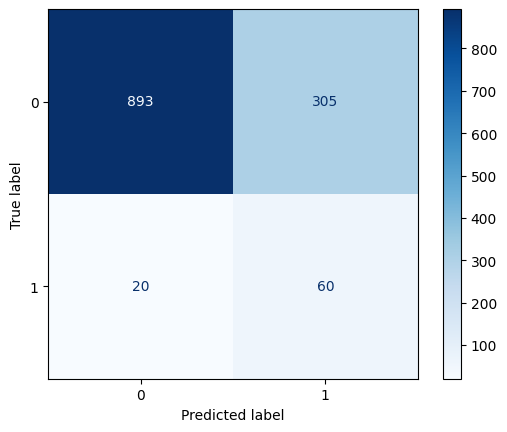

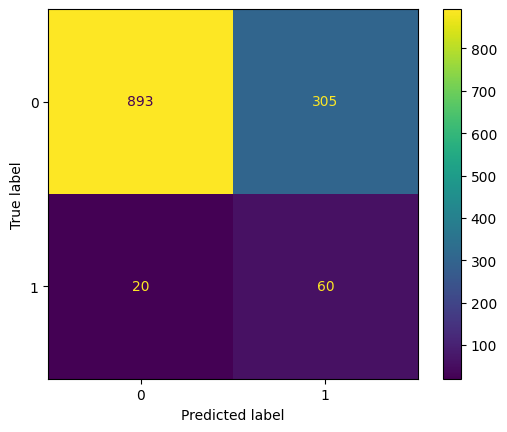

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues)
disp.plot()
pass

Запуск алгоритма SVC.

In [180]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

model = SVC(C=10.0, kernel='linear', gamma='scale', class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_error = np.mean(y_train != y_train_pred)
test_error = np.mean(y_test != y_test_pred)

train_error, test_error

(0.26591858037578286, 0.2621283255086072)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1198
           1       0.16      0.76      0.27        80

    accuracy                           0.74      1278
   macro avg       0.57      0.75      0.55      1278
weighted avg       0.93      0.74      0.80      1278



Ошибка на обучающей выборке составляет примерно 26.6%, а на тестовой — около 26.2%. Это говорит о том, что модель не переобучилась и демонстрирует схожую производительность на обеих выборках. 

Общие выводы

В ходе этой работы я научилась работать с датасетом, читать данные, обрабатывать, визуализировать их, бороться с несбалансированностью классов, обрабатывать пропущенные значения, обучать модель и анализировать результаты. В результате, получилось создать модель, которая достаточно неплохо предсказывает начилие у человека инсульта на основании различных признаков. Изначально, модель практически вообще не предсказывала наличие у человека этого заболевания, но в результате анализа, подбора параметров и борьбы с несбалансированностью классов, получила хорошую модель.